# Úkol č. 2 - Využití shlukování pro počítání objektů na obrázku
  * **Deadline je do 22. listopadu 23:59.** Pokud odevzdáte úkol do 29. listopadu 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte vhodným způsobem vybírat příznaky pro shlukovací algoritmy. Někdy je vhodné použít barevnou reprezentaci obrázku (RGB nebo spíše HSV), jindy je lepší použít souřadnice pixelů v obrázku.
  * Samozřejmě existují mnohem pokročilejší nástroje pro segmentaci objektů na obrázku, které jsou dostupné v různých knihovnách, ale tady nám jde o to vyzkoušet si na jednoduché úloze aplikaci základních shlukovacích metod.
  * Vaším cílem je využít algoritmus **KMeans a hierarchické aglomerativní shlukování** k tomu, abyste vytvořili jednoduchý kód, který, když na vstupu dostane obrázek z dané sady, dokáže vrátit **počet objektů**, které se na obrázku vyskytují.
  
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat
Budeme pracovat s obrázky, které jsou uložené v podadresáři `data` a originálně pocházejí z datasetu [CLEVR](https://cs.stanford.edu/people/jcjohns/clevr/). Na těchto obrázcích jsou různě rozmístěné barevné objekty na šedém pozadí.

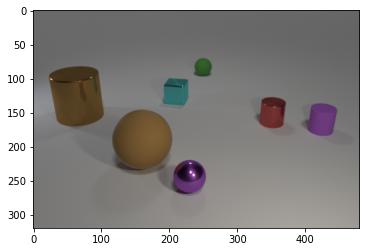

In [1]:
# Ukázka jednoho z obrázků
from PIL import Image
from matplotlib import pyplot as plt

with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image:
    plt.imshow(image)

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
- Vezměte libovolný obrázek z datasetu (pro začátek doporučuji nějaký, kde jsou objekty spíše dál od sebe), načtěte ho a zobrazte.
- Převeďte ho do `numpy` array, která pak přeskupte (reshape) do pole bodů v prostoru RGB, tj. do tvaru `(počet bodů, 3)`.
- V tomto barevném příznakovém prostoru zkuste provést shlukování (vyberte vhodný algoritmus na základě velikosti a charakteru dat) a diskutujte výsledky (které asi nebudou nic moc).
- Zkuste příznaky obohatit o prostorové souřadnice (k tomu využijte numpy funkci `meshgrid` s parametrem `indexing='ij'` a také funkci `concatenate`, která umožní připojení k obrázkovým datům). Jako výstup tohoto kroku byste měli mít pole ve tvaru `(počet bodů, 5)`, kde první 3 příznaky odpovídají barvám a zbylé dva souřadnicím každého z pixelů.
- V tomto obohaceném příznakovém prostoru znovu zkuste shlukování a diskutujte výsledky (které asi opět nebudou nic moc).
- Nyní to celé zkusíme znovu, ale po načtení a zobrazení si obrázek převedeme do barevné reprezentace HSV. V první fázi si tedy obrázek načtěte do HSV reprezentace (balíček PIL na to má metodu `convert("HSV")`).
- Dále v tomto novém barevném prostoru proveďte shlukování pomocí KMeans a vhodným výběrem shluků (koukejte na saturation příznak) si odseparujte barevné objekty od pozadí (bez jejich odlišení - to provedeme později).
Dostanete něco takového: 

![title](./mask_of_objects.png)
- Když už máme objekty odseparované od pozadí (použijte logickou masku pro filtrování array, kterou si vytvoříte v předchozím kroku), budeme dále pracovat pouze s odpovídajícími pixely (pozadí už ne bereme). 
- Nyní si pro tyto pixely vytvoříme reprezentaci pomocí jejich souřadnic v původním obrázku (použijeme výše zmíněný `meshgrid` a také logickou masku).
- V tomto souřadnicovém prostoru proveďte vhodné shlukování, aby došlo ke správnému odseparování předmětů.
Finální výstup by měl vypadat nějak takto:

![title](./final_output.png)
- Diskutujte úskalí navrženého postupu a jeho univerzálnost pro počítání objektů na libovolném pozadí resp. částečně se překrývajících objektů. 

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
- (až +4 body) Polaďte algoritmus tak, aby pro téměř libovolný vstup z dané datové sady vypsal správný počet objektů a odseparoval je tak, jak je zobrazeno výše. K tomu je třeba správně zvolit shlukovací algoritmus v posledním kroku a také kritérium pro automatickou detekci správného počtu shluků. Diskutujte Váš postup.
- (až +4 body) Poslední shlukování pro odseparování předmětů jsme dělali pouze v souřadnicovém prostoru. Zkuste experimentovat s reprezentací v prostoru, kde jsou zkombinovány jak barevné tak i souřadnicové příznaky (s různými váhami mezi oběma skupinami). Cílem je opět automatická detekce počtu objektů pro libovolný vstup z dané datové sady. Diskutujte Váš postup a případné výhody tohoto přístupu, ve kterém se kombinují oba typy příznaků.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

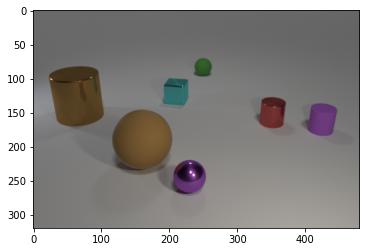

In [32]:
# Ukázka jednoho z obrázků
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.image import imread

image =  Image.open("data/CLEVR_test_001109.png").convert(colors="RGB")
plt.imshow(image)


data = np.array(image)
#load image
#image = imread('data/CLEVR_test_001109.png')

#get image dimensions
#w, h, d = original_shape = tuple(image.shape)



In [34]:
### odtud už je to Vaše
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
# otevření a převedení do stupňů šedi
data = np.delete(data,axis=2,obj=3)
#print(image_array)
w,h,d = tuple(data.shape)
data = np.reshape(data, (w * h, 3))
#data

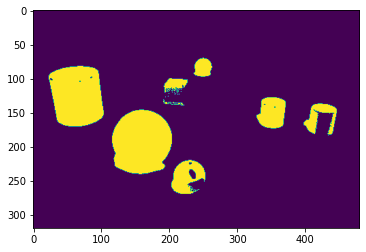

In [39]:
km = KMeans(n_clusters=2, n_init=30, max_iter=300).fit(data)
result = km.labels_.reshape(w,h)
plt.imshow(result)


In [49]:
indexes = []
y = range(w)
x = range(h)
for tmp in y:
    for tmp2 in x:
        indexes.append([tmp,tmp2])

In [50]:
data_indexed = np.concatenate((data,indexes),axis=1)

In [42]:
data_indexed.shape


(153600, 5)

In [43]:
data

array([[107, 107, 107],
       [105, 105, 105],
       [107, 106, 106],
       ...,
       [158, 154, 149],
       [158, 155, 149],
       [158, 155, 149]], dtype=uint8)

In [21]:
result.shape

(320, 480)

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int32)

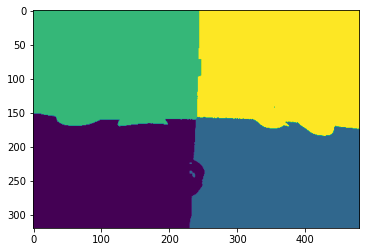

In [51]:
km = KMeans(n_clusters=4, n_init=10, max_iter=300).fit(data_indexed)
result = km.labels_.reshape(w,h)
plt.imshow(result)
result

In [468]:
from matplotlib.colors import rgb_to_hsv
#image_hsv = Image.open("data/CLEVR_test_001109.png").convert(colors="HSV")
image_hsv = imread("data/CLEVR_test_001109.png")
image_hsv = np.delete(image_hsv,axis=2,obj=3)
image_hsv = rgb_to_hsv(image_hsv)

In [469]:
### odtud už je to Vaše
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
data_hsv = np.array(image_hsv)


data_hsv = np.delete(data_hsv,axis=2,obj=(0,2))
data_hsv = np.reshape(data_hsv, (w * h, 1))
#data_hsv_indexed = np.concatenate((data_hsv,indexes),axis=1)

(153600,)


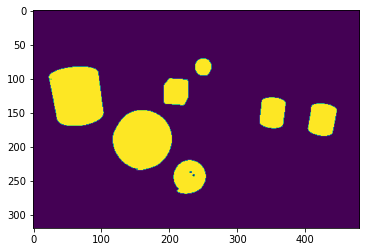

In [470]:
km_hsv = KMeans(n_clusters=2, n_init=50, max_iter=300).fit(data_hsv)

result = km_hsv.labels_.reshape(w,h)
plt.imshow(result)
print(km_hsv.labels_.shape)

In [471]:
result.reshape(320*480)
image.size

(480, 320)

In [472]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_hsv, km.labels_, metric='euclidean')

KeyboardInterrupt: 

In [473]:
idx = (result == 1)

In [474]:
ixy = (result == 0)

In [475]:
masked_image = np.zeros_like(image_hsv)

In [476]:
masked_image[idx] = np.array(image_hsv)[idx]

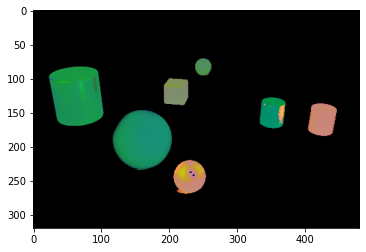

In [477]:
plt.imshow(masked_image)

In [488]:
data_hsv = data_hsv * 255

array([[ 0.       ],
       [ 0.       ],
       [ 2.3831775],
       ...,
       [14.525315 ],
       [14.525315 ],
       [14.525315 ]], dtype=float32)

In [663]:
print(data_hsv.shape)
masked_image_indexed = np.concatenate((data_hsv,np.array(indexes)),axis=1)

(153600, 1)


In [664]:
mmm = np.array(masked_image_indexed)[idx.reshape(w*h)]

In [665]:
#masked_image_indexed = masked_image_indexed.reshape(w*h,5)

In [680]:
data_hsv

array([[ 0.       ],
       [ 0.       ],
       [ 2.3831775],
       ...,
       [14.525315 ],
       [14.525315 ],
       [14.525315 ]], dtype=float32)

In [681]:
#km_masked_indexed = KMeans(n_clusters=7, n_init=10, max_iter=300).fit(mmm)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(mmm, method="single", metric="euclidean")

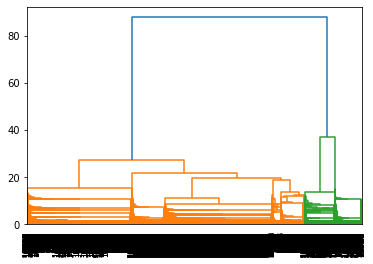

In [683]:
dendrogram(
    Z,
    leaf_rotation=90.,  # otočení popisů x-ové osy
    leaf_font_size=8.,  # velikost fontu popisů x-ové osy
)

plt.show()

In [718]:
from scipy.cluster.hierarchy import fcluster

max_d = 16
clusters = fcluster(Z, max_d, criterion="distance")

In [719]:
mm_image = np.zeros_like(result)

In [720]:
#mm_image[idx] = km_masked_indexed.labels_+1
mm_image[idx]  = clusters

In [721]:
pp = np.reshape(mm_image,(w,h))


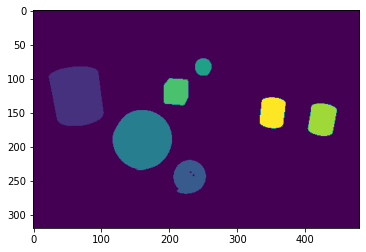

In [722]:
plt.imshow(pp)